# Multiple populations strategy for transfer PRS tutorial

This tutorial show step by step how to run the transprs framework using multiple population strategy to transfer the PRS model from UKBB (large number of samples) and JPN (large number of samples) to Vietnamese (VN) population (small number of samples) 

### Loading library

In [1]:
import transprs as tprs

### Prepare the input data

In the `tutorials/data` folder that download from here: https://drive.google.com/file/d/1HGFyQDnCKoGZEjXudEShVub3iS_DqpYd/view?usp=sharing, you should have:

- Test or target individual genotypes: `test_data_VN.bed/bim/fam`
- Test phenotype: `test.phenotype`
- Validation individual genotypes: `val_data_VN.bed/bim/fam`
- Validation phenotype: `validation.phenotype`
- Summary statistic files: `UKBB_height_sumstats.ss` from UKBB, `VN_train_sumstats.ss` from VN and `JPN_height_sumstat.ss` from JPN data

### Reading input data

We create a DataProcessor object that manage all the related data and will be used to process and interactive with PRS methods, validation and visualization

In [2]:
processor_UKBB = tprs.read_input(prefix_test="tutorials/data/test_data_VN",
                test_phenotype="tutorials/data/test.phenotype",
                sumstats_path="tutorials/data/UKBB_height_sumstats.ss",
                prefix_validation="tutorials/data/val_data_VN",
                validation_phenotype="tutorials/data/validation.phenotype",
                workdir="workdir_UKBB_tutorial")

Reading the Test genotype...


Mapping files: 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Reading the Validation genotype...


Mapping files: 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Phenotype stored in .phenotype
Phenotype stored in .phenotype_val


### Preprocessing

In the preprocessing, we included: cleaning SNPs, flip reverse, compute PCA 

In [3]:
tprs.Preprocessing(processor_UKBB, n_components=6)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999556.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72115 variants from chromosome 1, leaving 8751.
Pruned 73729 variants from

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999535.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72133 variants from chromosome 1, leaving 8733.
Pruned 73718 variants from

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


Stored sumstats workdir_UKBB_tutorial/preprocessed_sumstats in working directory
Stored test genotype workdir_UKBB_tutorial/preprocessed_test in working directory
Stored validation genotype workdir_UKBB_tutorial/preprocessed_test in working directory
Stored test genotype workdir_UKBB_tutorial/preprocessed_test in working directory


### Running PRS models

We provided a set of common PRS models to use to generate the basic results. They will be combined later.

Current support PRS models:
- P+T or Clumping: `tprs.methods.clumping`
- Double weight: `tprs.methods.double_weight`
- LDpred: `tprs.methods.ldpred`
- LDpred2: `tprs.methods.ldpred2`
- polyfun: `tprs.methods.polyfun`
- SBayesS: `tprs.methods.SBayesS`
- SBayesR: `tprs.methods.SBayesR`
- PRSCSx: `tprs.methods.multipop.prscsx`

In this tutorial, we will only run the P+T/clumping and Double weight methods for each population.

For each model, there are 5 steps:
- 1. Run the method
- 2. Generate PRS for validation data
- 3. Evaluate with the validation data
- 4. Generate PRS for test data
- 5. Evaludate with the test data

#### P+T/clumping model for UKBB

In [4]:
tprs.methods.clumping(processor_UKBB)

tprs.scoring.generate_prs(processor_UKBB,method="clumping")

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_UKBB,method="clumping",validate=False)

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

Clumping is running...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_out.log.
Options in effect:
--bfile workdir_UKBB_tutorial/preprocessed_validation
--clump workdir_UKBB_tutorial/preprocessed_sumstats
--clump-field P
--clump-kb 250
--clump-p1 1
--clump-r2 0.5
--clump-snp-field SNP
--out tmp_out

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_out.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_UKBB_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_UKBB_tutorial/adjusted_sumstats_clumping 3 4 9 header sum

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.99953

due to allele code mismatch); see tmp_results.nopred for details.


--score: 17 ranges processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['clumping']!
--- Done in 0:00:02 ---


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


The best fit p-value is 0.001
The best fit result is stored in processor.prs_validation['clumping']['best_fit']
The best fit result is stored in processor.tuning['clumping']['coef_squared']
Extracting adjusted sumstats from clumping method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_UKBB_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_UKBB_tutorial/adjusted_sumstats_clumping 3 4 9 header sum

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders presen

due to allele code mismatch); see tmp_results.nopred for details.
rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


The best fit p-value is 0.001
The best fit result is stored in processor.prs_test['clumping']['best_fit']
The best fit result is stored in processor.performance['clumping']['coef_squared']


#### Double weight model for UKBB

In [5]:
tprs.methods.double_weight(processor_UKBB)

tprs.scoring.generate_prs(processor_UKBB,method="double_weight")

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_UKBB,method="double_weight",validate=False)

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

Double weight method is running...
[1] "Adjusted BETA is done!"
Done Double weight!
The double weight result stores in .adjusted_ss['double_weight']!
--- Done in 0:01:33 ---
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_UKBB_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_UKBB_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders presen

due to allele code mismatch); see tmp_results.nopred for details.


--score: 17 ranges processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['double_weight']!


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:03 ---
The best fit p-value is 0.2
The best fit result is stored in processor.prs_validation['double_weight']['best_fit']
The best fit result is stored in processor.tuning['double_weight']['coef_squared']
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_UKBB_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_UKBB_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filt

due to allele code mismatch); see tmp_results.nopred for details.


--score: 1 range processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_test['double_weight']!
--- Done in 0:00:02 ---
The best fit p-value is 0.2
The best fit result is stored in processor.prs_test['double_weight']['best_fit']
The best fit result is stored in processor.performance['double_weight']['coef_squared']


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


### Running PRS models for VN population (change the sumstats)

In [6]:
processor_VN = tprs.read_input(prefix_test="tutorials/data/test_data_VN",
                test_phenotype="tutorials/data/test.phenotype",
                sumstats_path="tutorials/data/VN_train_sumstats.ss",
                prefix_validation="tutorials/data/val_data_VN",
                validation_phenotype="tutorials/data/validation.phenotype",
                workdir="workdir_VN_tutorial")

Reading the Test genotype...


Mapping files: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]


Reading the Validation genotype...


Mapping files: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]


Phenotype stored in .phenotype
Phenotype stored in .phenotype_val


In [7]:
tprs.Preprocessing(processor_VN, n_components=6)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999556.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72115 variants from chromosome 1, leaving 8751.
Pruned 73729 variants from

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999535.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72133 variants from chromosome 1, leaving 8733.
Pruned 73718 variants from

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


Stored sumstats workdir_VN_tutorial/preprocessed_sumstats in working directory
Stored test genotype workdir_VN_tutorial/preprocessed_test in working directory
Stored validation genotype workdir_VN_tutorial/preprocessed_test in working directory
Stored test genotype workdir_VN_tutorial/preprocessed_test in working directory


In [8]:
# Run P+T
tprs.methods.clumping(processor_VN)

tprs.scoring.generate_prs(processor_VN,method="clumping")

tprs.metrics.coef_squared_evaluation(processor_VN,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_VN,method="clumping",validate=False)

tprs.metrics.coef_squared_evaluation(processor_VN,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)


Clumping is running...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_out.log.
Options in effect:
--bfile workdir_VN_tutorial/preprocessed_validation
--clump workdir_VN_tutorial/preprocessed_sumstats
--clump-field P
--clump-kb 250
--clump-p1 1
--clump-r2 0.5
--clump-snp-field SNP
--out tmp_out

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_out.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rat

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:46 ---
Extracting adjusted sumstats from clumping method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_clumping 3 4 9 header sum

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

--score: 13 ranges processed (4 empty ranges skipped).
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['clumping']!


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:02 ---
The best fit p-value is 0.000003
The best fit result is stored in processor.prs_validation['clumping']['best_fit']
The best fit result is stored in processor.tuning['clumping']['coef_squared']
Extracting adjusted sumstats from clumping method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_clumping 3 4 9 header sum

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders a

--- Done in 0:00:01 ---
The best fit p-value is 0.000003
The best fit result is stored in processor.prs_test['clumping']['best_fit']
The best fit result is stored in processor.performance['clumping']['coef_squared']


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


In [9]:
# Run double weight
tprs.methods.double_weight(processor_VN)

tprs.scoring.generate_prs(processor_VN,method="double_weight")

tprs.metrics.coef_squared_evaluation(processor_VN,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_VN,method="double_weight",validate=False)

tprs.metrics.coef_squared_evaluation(processor_VN,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

Double weight method is running...
[1] "Adjusted BETA is done!"
Done Double weight!
The double weight result stores in .adjusted_ss['double_weight']!
--- Done in 0:02:10 ---
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
C

 done.
Total genotyping rate is 0.999535.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
--score: 984245 valid predictors loaded.
--score: 13 ranges processed (4 empty ranges skipped).
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['double_weight']!


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:03 ---
The best fit p-value is 0.00003
The best fit result is stored in processor.prs_validation['double_weight']['best_fit']
The best fit result is stored in processor.tuning['double_weight']['coef_squared']
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filt

--- Done in 0:00:02 ---
The best fit p-value is 0.00003
The best fit result is stored in processor.prs_test['double_weight']['best_fit']
The best fit result is stored in processor.performance['double_weight']['coef_squared']


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


### Running PRS models for JPN population (change the sumstats)

In [10]:
processor_JPN = tprs.read_input(prefix_test="tutorials/data/test_data_VN",
                test_phenotype="tutorials/data/test.phenotype",
                sumstats_path="tutorials/data/JPN_height_sumstat.ss",
                prefix_validation="tutorials/data/val_data_VN",
                validation_phenotype="tutorials/data/validation.phenotype",
                workdir="workdir_JPN_tutorial")

Reading the Test genotype...


Mapping files: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


Reading the Validation genotype...


Mapping files: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]


Phenotype stored in .phenotype
Phenotype stored in .phenotype_val


In [11]:
tprs.Preprocessing(processor_JPN, n_components=6)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999556.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72115 variants from chromosome 1, leaving 8751.
Pruned 73729 variants from

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999535.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72133 variants from chromosome 1, leaving 8733.
Pruned 73718 variants from

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


Created folder workdir_JPN_tutorial for working directory
Stored sumstats workdir_JPN_tutorial/preprocessed_sumstats in working directory
Stored test genotype workdir_JPN_tutorial/preprocessed_test in working directory
Stored validation genotype workdir_JPN_tutorial/preprocessed_test in working directory
Stored test genotype workdir_JPN_tutorial/preprocessed_test in working directory


In [12]:
# Run P+T
tprs.methods.clumping(processor_JPN)

tprs.scoring.generate_prs(processor_JPN,method="clumping")

tprs.metrics.coef_squared_evaluation(processor_JPN,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_JPN,method="clumping",validate=False)

tprs.metrics.coef_squared_evaluation(processor_JPN,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)


Clumping is running...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_out.log.
Options in effect:
--bfile workdir_JPN_tutorial/preprocessed_validation
--clump workdir_JPN_tutorial/preprocessed_sumstats
--clump-field P
--clump-kb 250
--clump-p1 1
--clump-r2 0.5
--clump-snp-field SNP
--out tmp_out

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_out.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:24 ---
Extracting adjusted sumstats from clumping method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_JPN_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_JPN_tutorial/adjusted_sumstats_clumping 3 4 9 header sum

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717

due to allele code mismatch); see tmp_results.nopred for details.


--score: 17 ranges processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['clumping']!


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:02 ---
The best fit p-value is 0.001
The best fit result is stored in processor.prs_validation['clumping']['best_fit']
The best fit result is stored in processor.tuning['clumping']['coef_squared']
Extracting adjusted sumstats from clumping method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_JPN_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_JPN_tutorial/adjusted_sumstats_clumping 3 4 9 header sum

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders an

due to allele code mismatch); see tmp_results.nopred for details.


--- Done in 0:00:01 ---
The best fit p-value is 0.001
The best fit result is stored in processor.prs_test['clumping']['best_fit']
The best fit result is stored in processor.performance['clumping']['coef_squared']


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


In [13]:
# Run double weight
tprs.methods.double_weight(processor_JPN)

tprs.scoring.generate_prs(processor_JPN,method="double_weight")

tprs.metrics.coef_squared_evaluation(processor_JPN,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_JPN,method="double_weight",validate=False)

tprs.metrics.coef_squared_evaluation(processor_JPN,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

Double weight method is running...
[1] "Adjusted BETA is done!"
Done Double weight!
The double weight result stores in .adjusted_ss['double_weight']!
--- Done in 0:02:11 ---
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_JPN_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_JPN_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.

due to allele code mismatch); see tmp_results.nopred for details.


--score: 973782 valid predictors loaded.
--score: 17 ranges processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['double_weight']!


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:04 ---
The best fit p-value is 0.0003
The best fit result is stored in processor.prs_validation['double_weight']['best_fit']
The best fit result is stored in processor.tuning['double_weight']['coef_squared']
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_JPN_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_JPN_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

257867 MB RAM detected; reserving 128933 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant fil

due to allele code mismatch); see tmp_results.nopred for details.


--score: 973782 valid predictors loaded.
--score: 1 range processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_test['double_weight']!


--- Done in 0:00:03 ---
The best fit p-value is 0.0003
The best fit result is stored in processor.prs_test['double_weight']['best_fit']
The best fit result is stored in processor.performance['double_weight']['coef_squared']


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


### Combine populations with multiple populations strategy

In this strategy, we used combination of all methods for each combination. It will be easy to extend the number of population and methods.

The suffix number is the order of population in the list.

In [14]:
# Set a list of all DataProcessor objects
processors = [processor_UKBB,processor_VN,processor_JPN]

In [15]:
# Set a list of methods user wants to combine
methods = ["clumping","double_weight"]

In [16]:
# Perform the combination with weighting method as linear regression
tprs.Combine_multipop_methods(processors, methods=methods,
                                      trait_col="Height", 
                                      prs_col="SCORESUM",
                                      use_col="BETA",
                                      metric="coef_squared")

Estimating mixing weights...
[-6.1510915  -0.54023327 -8.57782945]
The clumping0+clumping1+clumping2 result stores in .prs_test['clumping0+clumping1+clumping2']!
--- Done in 0:00:00 ---
The best fit p-value is combine
The best fit result is stored in processor.prs_test['clumping0+clumping1+clumping2']['best_fit']
The best fit result is stored in processor.performance['clumping0+clumping1+clumping2']['coef_squared']
Estimating mixing weights...
[-6.41219946 -0.98503098 -8.56773663]
The clumping0+clumping1+double_weight2 result stores in .prs_test['clumping0+clumping1+double_weight2']!
--- Done in 0:00:00 ---
The best fit p-value is combine
The best fit result is stored in processor.prs_test['clumping0+clumping1+double_weight2']['best_fit']
The best fit result is stored in processor.performance['clumping0+clumping1+double_weight2']['coef_squared']
Estimating mixing weights...
[-6.61015399 -3.7506394  -8.75732957]
The clumping0+double_weight1+clumping2 result stores in .prs_test['clumping

### Visualization

User can use `bar_plot` or `box_plot` to visualize the data

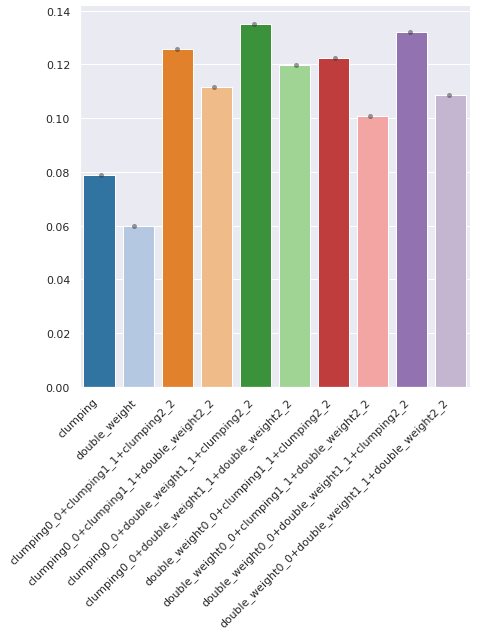

In [17]:
tprs.visualization.visualize_performance(processor_UKBB,metric="coef_squared",plot_type="bar_plot",cmap="tab20")